In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_bins(data):
    bins = np.arange(data.min(), data.max() + 1, 1)
    plt.hist(resized[0, :], bins=bins)
    plt.show()


[[22 20 19 20 20 22 20 20 21 19 21 21 19 19 21 19  0  0  0  0  1 15 22 20
  21 22 14  0  0  0  0  0 17 18 19 18 21 18 18 21 21 23 12  1  1  1  1  1
  20 20 20 20 22  8  0  0  0  0  5 21 21 19 18 18  1  0  0  1  0  0  1  1
   1  0  6 19 20 19 18 18  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  1  0  0  0  0  1  1  0  0  0 17 17 17 17 18 18 19 19
  21 21 21 21 21 21 21 21  1  0  1  0  0  1  0  1  0  0  0  0  0  0  0  0
  20 20 22 22 22 22 22 22 22 18 13  1  1  2  1  2 19 20 20 19 22  6  1  0
   2  0  4 22 18 17 18 18 19 30 29 30 25 14  8 10  8  9  8 21 18 21 18 18
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  1  1  1  0  6 22 29
  31 23 10  2  1  0  0  0  0  0  0  0  0 10 21 16 19 19 17 24 31 29 29 31
   4  4  5  4  7  3  3  4  2  2  0 16 26 28 27 24  4  9  6  4 11  4  3  3
   2  4  5 17 20 22 19 22  2 13  5  9  6 11  4  3  6  4  8 13 19 19 20 18
   0 10  8  7  7 11  4  5 10  5  6 29 32 33 32 31  6  6  6  6 10 17 31 30
  37 32 16  5  9  9  9  6 11 12 11 11 

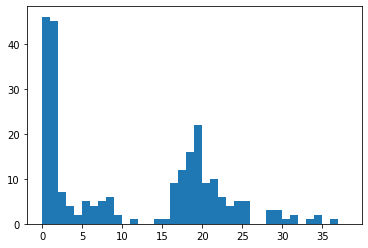

[[19 21 19  0 21  0 19 21  1 20  0 19  0  1 19  0  1  0  0  0  0 17 20 21
   1  1  0 22 22  2 20  1 17 29  9 21  0  0  0  1 30  0  0 18 29  5  3 28
   6  3 22  6  5 19  8  8 33  6 34  9 11  7  5 20  1 29  7  1 31 28 34 36
   8 31  8  8 28  1 25  5 16 16  1 16 17 16  0 17  0  0 16  1 16  1 16  0
   0 17  1  0  1  1 17 18 16  0  1 24  0 18  1 19  1 25  0  2 18 18  2 23
   0 18  0 22 19 18 20 17 17  0 20 17  1  1  1  2  2 18  1  1  0 23 22  0
   0 19  0  0  1  0 24  0 25  0  2 23 18  1 17  0  1 17  1  1 18 19 18  0
  19  0  1 18 19  1  0  1 18  1 19 19  0  0  1  1 19  1  0 21  1  1 19 20
   1  0 19 18  1 17 18 22 19 19 20 21 21 20  1  1 15 18 16  2 14  3 25 19
  24  5 25  7  1  1  4  4  8  7 21  0 23 24 19  1 24 19  7  6  0  3 21  0]]


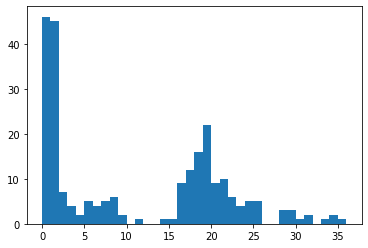

[[22 20 19 20 20 22 20 20 21 19 21 21 19 19 21 19  0  0  0  0  1 15 22 20
  21 22 14  0  0  0  0  0 17 18 19 18 21 18 18 21 21 23 12  1  1  1  1  1
  20 20 20 20 22  8  0  0  0  0  5 21 21 19 18 18  1  0  0  1  0  0  1  1
   1  0  6 19 20 19 18 18  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  1  0  0  0  0  1  1  0  0  0 17 17 17 17 18 18 19 19
  21 21 21 21 21 21 21 21  1  0  1  0  0  1  0  1  0  0  0  0  0  0  0  0
  20 20 22 22 22 22 22 22 22 18 13  1  1  2  1  2 19 20 20 19 22  6  1  0
   2  0  4 22 18 17 18 18 19 30 29 30 25 14  8 10  8  9  8 21 18 21 18 18
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  1  1  1  0  6 22 29
  31 23 10  2  1  0  0  0  0  0  0  0  0 10 21 16 19 19 17 24 31 29 29 31
   4  4  5  4  7  3  3  4  2  2  0 16 26 28 27 24  4  9  6  4 11  4  3  3
   2  4  5 17 20 22 19 22  2 13  5  9  6 11  4  3  6  4  8 13 19 19 20 18
   0 10  8  7  7 11  4  5 10  5  6 29 32 33 32 31  6  6  6  6 10 17 31 30
  37 32 16  5  9  9  9  6 11 12 11 11 

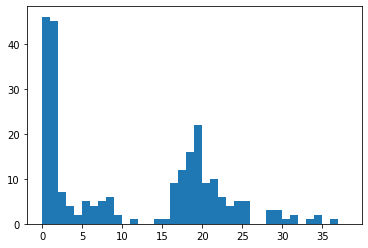

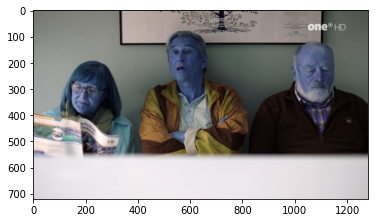

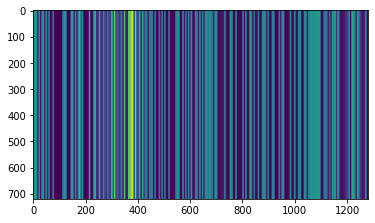

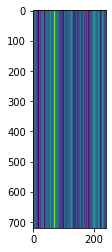

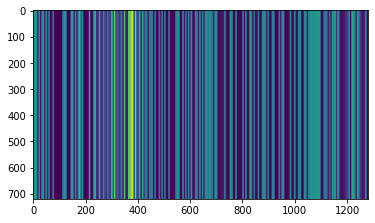

##############################################
[[18 18 19 21 21 21 21 21 22 23 23 23 23 22 22 22  1  1  1  1  1 14 21 17
  22 20 15  0  1  1  1  1 19 19 19 19 19 19 19 19 19 22 11  0  0  0  0  0
  20 20 20 20 23  9  2  1  1  1  4 21 19 18 19 19  1  1  1  1  0  0  0  0
   0  1  6 17 20 20 20 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  1  0  0  0  1  0  0  1  0  0  0  0 18 19 19 18 19 19 19 19
  18 19 20 20 18 18 18 18  0  1  1  1  0  0  1  1  0  0  0  0  0  0  0  0
  18 19 18 19 20 20 20 20 17 21 12  1  0  0  0  0 18 18 18 18 19  6  0  1
   0  1  0  1  0  0  0  0  0  0  0  0  8  0  0  1  0  0  5 21 18 19 18 19
   1  0  0  1  0  0  0  0  0  0  0  0  1  1  1  1  0  0  0  0  1 10 18 17
  17 18 10  2  1  1  1  1 19 19 19 19 21  5  1  0  0  1  1 21 17 19 18 18
   3  1  1  1  0  2  5  0  0  3  1  0  0  0  0  0  2  0  0  0  0 14 23 21
  21 19 18 17 19 19 21 14  7  0  0  0  0  0  1  0  0  0  0  1  1  1  1  0
  19 21 21 19 19 18 21 18 21 15 18 19 21 19 21 18 18 20 19 19 19 

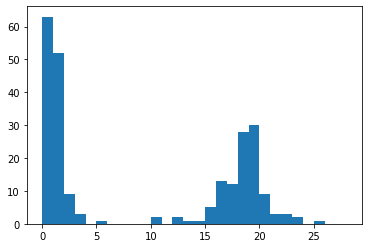

[[19 22 22  1 20  1 19 19  0 20  1 18  1  0 20  0  0  0  0  1  0 19 19 18
   1  1  0 18 19  0 18  1  0  0  1 19  0  0  1  0 17  1 19  0 19  1  0  0
   0 21 19  0  0  1 21 20 19 19 21  2 17  0  5 17  1  1 12  1 18  0  2  2
  16 17 16  0  2 14  1 16 15  1  1  1  0  0 17  1  1 16 16 23 18 18 16 16
  16  0  1  1  1  1 16  0  0  0 20  2  0 16 18 17  1  0  0  0  1  0  1  1
  18  1  0 18 19  1  0  0  3  3  3 19  1 19 15  2  1 19 25 20  1  1  1 17
  23  0  1 16  0 18 22 19  0  0  2 20  1  0 18  1  1 18  1  0 19 18 17  0
  18  1  1 19 18  0  0  0 19  1 18 18  0  0  0  0 18  0  0 18  1  0 18 18
   1  0 19 19  1 18 18 19 19 18 19 19  0  0  2  1 10  1 15 20 10 16 13  0
   0 19 19 18  2 18  0 16 15  0 19 19 12 15 20  1 17 17 18  1 17 17  0  0]]


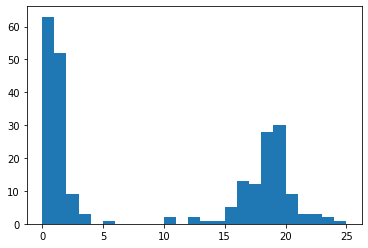

[[18 18 19 21 21 21 21 21 22 23 23 23 23 22 22 22  1  1  1  1  1 14 21 17
  22 20 15  0  1  1  1  1 19 19 19 19 19 19 19 19 19 22 11  0  0  0  0  0
  20 20 20 20 23  9  2  1  1  1  4 21 19 18 19 19  1  1  1  1  0  0  0  0
   0  1  6 17 20 20 20 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  1  0  0  0  1  0  0  1  0  0  0  0 18 19 19 18 19 19 19 19
  18 19 20 20 18 18 18 18  0  1  1  1  0  0  1  1  0  0  0  0  0  0  0  0
  18 19 18 19 20 20 20 20 17 21 12  1  0  0  0  0 18 18 18 18 19  6  0  1
   0  1  0  1  0  0  0  0  0  0  0  0  8  0  0  1  0  0  5 21 18 19 18 19
   1  0  0  1  0  0  0  0  0  0  0  0  1  1  1  1  0  0  0  0  1 10 18 17
  17 18 10  2  1  1  1  1 19 19 19 19 21  5  1  0  0  1  1 21 17 19 18 18
   3  1  1  1  0  2  5  0  0  3  1  0  0  0  0  0  2  0  0  0  0 14 23 21
  21 19 18 17 19 19 21 14  7  0  0  0  0  0  1  0  0  0  0  1  1  1  1  0
  19 21 21 19 19 18 21 18 21 15 18 19 21 19 21 18 18 20 19 19 19 19 21 21
  21 22  8  1  2  2  1  0 17 17 17 17 

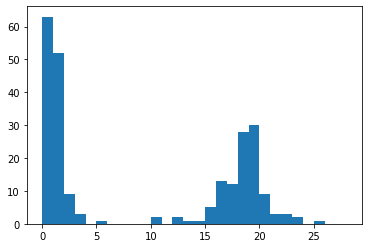

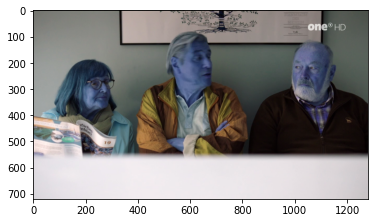

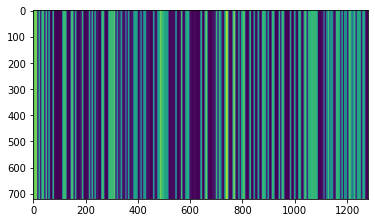

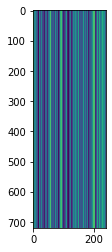

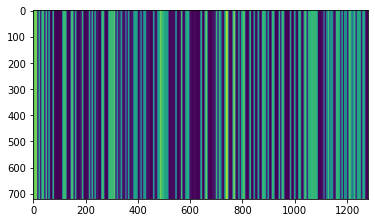

##############################################
[[19 20 23 22 21 21 21 21 19 21 21 21 21 21 21 21  1  0  1  1  1 12 22 18
  19 22 14  1  1  1  1  1 17 21 18 21 21 19 21 21 18 19 14  1  1  1  1  1
  18 19 18 16 18  7  0  1  2  2  3  4  9  6  6  6  1  0  0  1  0  0  0  0
   0  0  3  8  6  9  8  6  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  8  8  8  8  8  8  8
   9  9  9  9  8  8  9  9  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  1
   8  8  8  8  8  8  9 10  7  7  8  7  1  0  1  1  4  5  9  6  6  5  3  3
   1  0  1  0  0  0  0  0  8  8  8  6  5  4  2  1  1  0  2  9 10 10 10 10
   1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  4  5  8  8
   8  6  1  0  1  0  1  1  1  1  0  1  1  0  1  1  3  1  3  9 10 12 11  4
   1  1  2  1  1  5 12 12 14 11  7  5  3  2  3  3 11 13 10 11 11 12 10 12
  10 13  5  1  2  1  0  1 12 12  8 10 11  1  0  0  0  1  0  1  2  1  2  4
   1  1  1  1  1  1  1  1  0  1  3  8 10 10 10 10 12 12 12 13 10 

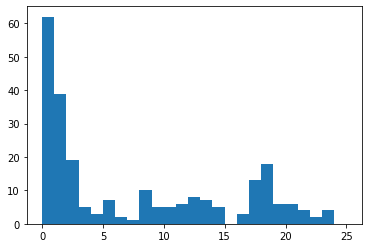

[[23 20 21  1 19  1 18 20  1 18  2  6  0  0  9  0  0  0  0  0  0  8  9  8
   1  0  0  8  9  0  9  2  0  8  1 10  1  0  0  1  8  0  0  2 12  2 13  2
  10 11  1  8  0  1  1  1 10 12  3 10  7  8  0  0 12 13  0  2 10  5 18 22
  21 17  0 12 11  2  1 11  0  2 13 16 17 13  2  2 13 14  0 17  1 21  2  1
   0  0  0  0  0  0  0 23  0 22  1  1  1  1 19 17 17  5  1  8 12  0 12 12
   2  1  2 14  2 14 18 18  1 17  1 17 17  1 18  1  0  1  0 17 18 18 18  1
   1  0 18 18 17 18  0  1  0  0  0  0  0  1 16  0  0 16  0  0 11 13 11  5
   8  2  0  5  6  1  0  1 20  2 18 20  5  0  1  3 14  3  0 11  4  1 20 23
   0  0 19 12  2  5 13 18 23 21 20  4 19  1  0  2 18  5  0 17  0  1  1  0
   0 18 19 19  1 17  0 17  0 18  1  0  0 18  0  0  4  3 14  9  2  3  8  1]]


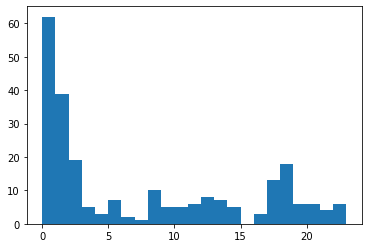

[[19 20 23 22 21 21 21 21 19 21 21 21 21 21 21 21  1  0  1  1  1 12 22 18
  19 22 14  1  1  1  1  1 17 21 18 21 21 19 21 21 18 19 14  1  1  1  1  1
  18 19 18 16 18  7  0  1  2  2  3  4  9  6  6  6  1  0  0  1  0  0  0  0
   0  0  3  8  6  9  8  6  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  8  8  8  8  8  8  8
   9  9  9  9  8  8  9  9  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  1
   8  8  8  8  8  8  9 10  7  7  8  7  1  0  1  1  4  5  9  6  6  5  3  3
   1  0  1  0  0  0  0  0  8  8  8  6  5  4  2  1  1  0  2  9 10 10 10 10
   1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  4  5  8  8
   8  6  1  0  1  0  1  1  1  1  0  1  1  0  1  1  3  1  3  9 10 12 11  4
   1  1  2  1  1  5 12 12 14 11  7  5  3  2  3  3 11 13 10 11 11 12 10 12
  10 13  5  1  2  1  0  1 12 12  8 10 11  1  0  0  0  1  0  1  2  1  2  4
   1  1  1  1  1  1  1  1  0  1  3  8 10 10 10 10 12 12 12 13 10  6  2  4
   2  1  5 12  9 10 11 12  9  5  7  7 

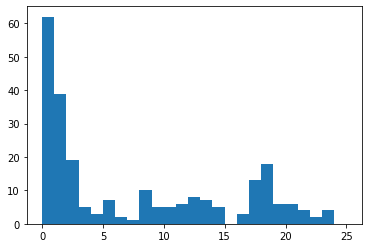

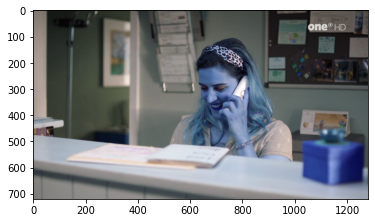

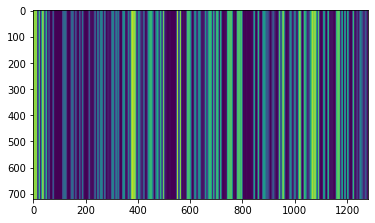

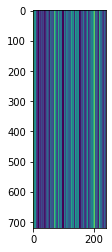

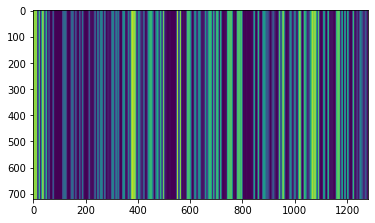

##############################################
[[23 22 21 21 19 19 19 21 22 22 23 23 22 22 22 15  0  1  1  1  1 14 21 18
  22 22  9  1  1  1  1  5 19 19 19 19 19 19 19 19 18 18 10  1  1  1  1  1
  19 19 19 19 22  8  0  1  1  0  8 21 19 19 19 19  0  0  0  0  0  0  0  0
   0  0  7 22 19 19 21 22  1  1  2  0  1  0  1  0  0  0  0  1  1  1  1  1
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7  7  7  7  7  7  7  7
   7  7  7  7  7  7  7  7  1  1  1  1  1  1  1  1  1  1  1  1  0  0  0  0
   7  7  7  7  9  9  7  5  8  5  3  2  1  1  1  1  7  8  7  5  4  3  1  1
   1  1  1  3  4  7  7  5  4  3  2  2  2  2  2  2  3  4  7  8 10 11 11 11
   0  0  0  0  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  1  2  4  8  9  9  7  4  4  8  9  9  9
   9  7  5  3  3  2  2  5  8  9 11 12 11 12  9  7  5  3  2  2  2  2  2  2
   2  5  8 12 15 23 16 10  9  5  2  2  2  3  5  5  7  7  7  7  7  7  7  5
   5  4  4  4  3  4  4  4  4  3  9 14 12 12 12 14  5  5  5  5  4 

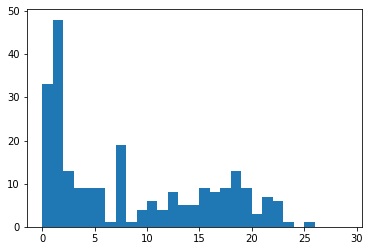

[[21 22 22  1 20  1 19 19  1 19  1 19  0  0 19  2  0  1  0  0  0  7  7  7
   1  1  0  7  7  1  7  1  7  2  3 11  0  1  0  0  0  0  0  9  9  5  7 12
   2  2 22  2  6  7  4  4 12  5 13  5  3 10 11 11  3 14  2  4  7 15 14 18
   5  7  3  7 10  0 25 14  1  0  1  0 10  2  1 10 10 11 16  4  0 15 21 15
   2 21  1  1  0  1  1 16 22 21  1 19  2  1 18  1  1 19  1 21 18 19 23 12
  13  1 12  1 12  1 10  0  0  1 13 14 17  1  1  0  0  0  0  0 17 18  1  0
  16  1  1  1 15 17 18 18  1 17 18 18 19  1 18  1  1 17  0  1 16 16 17  2
  16  1  0 15 15  1  1  0  7  1  7  8  1  1  1  1 18  2  3 20  3  1 18 18
   0  0 15 16  0 13 13 17 12  9  7  0  5  4  2  5  7 17 15  4 14  4  5 12
  21 21 15 18  7 22  7  2  3  7  3 17  5  3 12  1  1  4 22 20  9  5 16  4]]


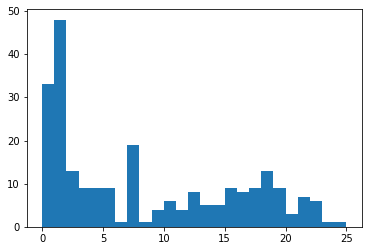

[[23 22 21 21 19 19 19 21 22 22 23 23 22 22 22 15  0  1  1  1  1 14 21 18
  22 22  9  1  1  1  1  5 19 19 19 19 19 19 19 19 18 18 10  1  1  1  1  1
  19 19 19 19 22  8  0  1  1  0  8 21 19 19 19 19  0  0  0  0  0  0  0  0
   0  0  7 22 19 19 21 22  1  1  2  0  1  0  1  0  0  0  0  1  1  1  1  1
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7  7  7  7  7  7  7  7
   7  7  7  7  7  7  7  7  1  1  1  1  1  1  1  1  1  1  1  1  0  0  0  0
   7  7  7  7  9  9  7  5  8  5  3  2  1  1  1  1  7  8  7  5  4  3  1  1
   1  1  1  3  4  7  7  5  4  3  2  2  2  2  2  2  3  4  7  8 10 11 11 11
   0  0  0  0  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  1  2  4  8  9  9  7  4  4  8  9  9  9
   9  7  5  3  3  2  2  5  8  9 11 12 11 12  9  7  5  3  2  2  2  2  2  2
   2  5  8 12 15 23 16 10  9  5  2  2  2  3  5  5  7  7  7  7  7  7  7  5
   5  4  4  4  3  4  4  4  4  3  9 14 12 12 12 14  5  5  5  5  4  7 11 15
  11 10  8  5  5  5  4  4  3  3  3  3 

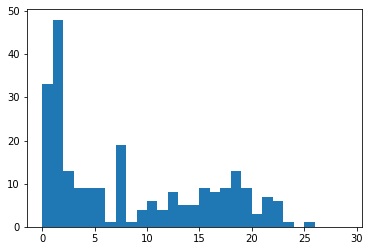

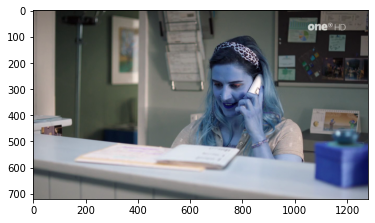

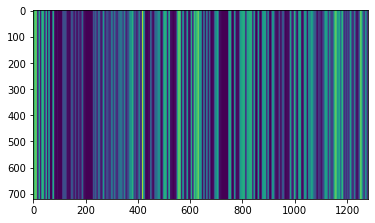

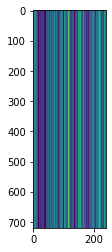

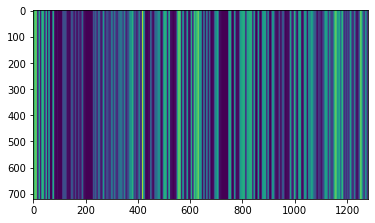

##############################################
[[12 15 18 16 15 15 15 12 11 15 15 11 11 12 11 10  9  9 10 11 12 12  8  9
  10 10  8  2  0  0  0  0  3 10 10 11 11  5  3  2  2  1  2  5  5  6  9  9
   9  8  6  6  4  3  2  1  2  3  1  5  8  8  8  9  6  3  1  2  2  2  3  3
   5  5  6  5  2  2  1  1  0  1  1  0  0  0  2  6  8  7  7  7  4  4  3  2
   1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  2  4  5  5  6  6  6  6  6
   6  6  6  5  4  9  6  4  3  2  1  1  1  1  1  1  1  1  2  4  2  0  0  3
   5  8  9  9  9  9  9  9  9  9  5  1  0  0  1  3  5  8  9  9  9  4  1  0
   0  0  2  9  8  8  8  9  9  8  8  8 10  5  1  1  1  1  1  1  0  0  0  0
   0  0  0  0  0  0  0  0  2  0  2  9  9  9  9  9  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  1  2  5  9 10 11  7  2  1  1  0  0  3  5  3  5  4  3
   4  3  3  2  1  3  3  1  0  3  2  0  0  0  2  4  7  7  5  8  8  8  5  2
   4  4  2  0  0  0  0  0  3  0  0  0  1  2  1  2  2  2  2  2  2  2  3  3
   5  7  8 10 10 10 10 10 10 10 10  9  9  9  9  9 10 10 11 11  9 

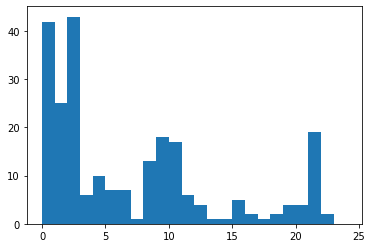

[[18 12 12 10 10  0 10  2  6  6  2  8  1  4  2  1  7  4  0  0  0  5  6  8
   1  1  0  9  9  0  9  0  8  8  1  0  0  1  9  0  0  0 10  1  5  3  1  0
   5  3  0  0  2  2  8 10  9 11  9  2  0  0  9 10  5  8  9  1 10  0  4  0
   9 10  6  2  8  0  0  0  0  8  1  8  0 10  9  1  9  0 10 10  1  0  9  0
  11  0  0  0  0  1  0  0  0 12 11  0  0  1  1  1  0  0  2 11  1  1 13  2
   0 14 17  2 16 20  1 15 21  2  2 22 21 21 21  2  2  2 21 22 21  2 20 21
   2 21  2 21 21  2 21  2 19 21 21 21  2  2 21  2  2 21  2  2 21 21 20  2
  19  2  2 21 20  2  2  2 19  2 18 19  2  1  0  0  9  2  3 15  3  2 11 11
   2  2 15 12  2 10 10 10 16 15 15  2  2  2  1  1  4  6  9 10  9  3  8  4
   5  4  6  5  9  8  0  4  1  4  4  1  4  5  8 10 10  6  1  2  3  8  9  9]]


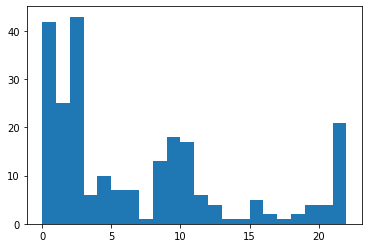

[[12 15 18 16 15 15 15 12 11 15 15 11 11 12 11 10  9  9 10 11 12 12  8  9
  10 10  8  2  0  0  0  0  3 10 10 11 11  5  3  2  2  1  2  5  5  6  9  9
   9  8  6  6  4  3  2  1  2  3  1  5  8  8  8  9  6  3  1  2  2  2  3  3
   5  5  6  5  2  2  1  1  0  1  1  0  0  0  2  6  8  7  7  7  4  4  3  2
   1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  2  4  5  5  6  6  6  6  6
   6  6  6  5  4  9  6  4  3  2  1  1  1  1  1  1  1  1  2  4  2  0  0  3
   5  8  9  9  9  9  9  9  9  9  5  1  0  0  1  3  5  8  9  9  9  4  1  0
   0  0  2  9  8  8  8  9  9  8  8  8 10  5  1  1  1  1  1  1  0  0  0  0
   0  0  0  0  0  0  0  0  2  0  2  9  9  9  9  9  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  1  2  5  9 10 11  7  2  1  1  0  0  3  5  3  5  4  3
   4  3  3  2  1  3  3  1  0  3  2  0  0  0  2  4  7  7  5  8  8  8  5  2
   4  4  2  0  0  0  0  0  3  0  0  0  1  2  1  2  2  2  2  2  2  2  3  3
   5  7  8 10 10 10 10 10 10 10 10  9  9  9  9  9 10 10 11 11  9  9  9  9
   9  6  6  5  4  2  1  1  0  0  0  0 

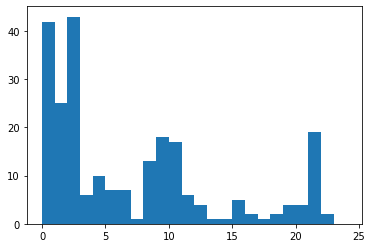

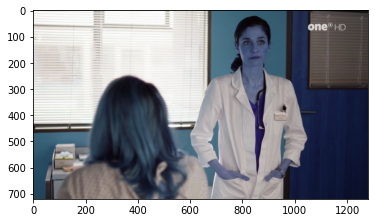

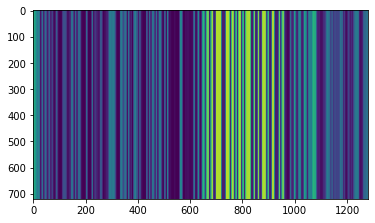

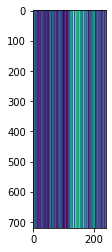

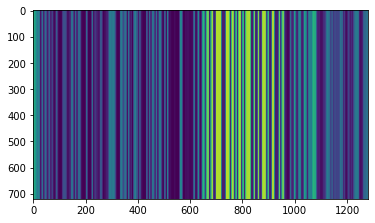

##############################################
[[11 11 11 11 11 11 10 11 11 11 11 11 11 11 11 11  0  0  0  0  1  8 12 11
   8 10  5  1  0  0  0  0  9  9  9  9  9  9  9  9  8 10  5  1  0  0  0  0
   9  9  9  9  9  3  0  0  2  1  4 10 10 10 10 10  0  0  0  0  0  1  0  0
   2  0  7 11 11 10 11 10  3  0  2  0  0  1  1  0  0  2  2  1  0  0  0  0
   0  0  0  0  0  0  1  1  1  0  0  0  0  0  2  0 11 11 11 11 11 11 11 11
  12 12 12 12 12 12 12 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  11 12 12 13 13 13 12 13 10 12  5  0  0  0  0  1  9  9  9  9 10  3  0  0
   0  1  1  6  6  8  5  4  3  1  1  1  0  1  5  2  2  2  5  9  9 10 10 10
   0  0  1  1  0  0  0  0  0  0  1  1  0  0  0  0  0  1  1  0  1  8  9  7
   5  9  5  1  0  0  0  3  1  1  1  3  4  2  0  1  1  1  8  8 12 14 13 13
   0  2  1  0  1  6 10 10  9  9 10  4  1  1  1  2  5  9  9  9 11 10  8  8
   8  8  4  1  1  0  0  2 14 11  9  9 10  2  1  1  0  0  0  0  0  0  0  2
   5  1  0  0  1  1  1  1  1  2  6 10 10 11  9  8 10 10  9 11 17 

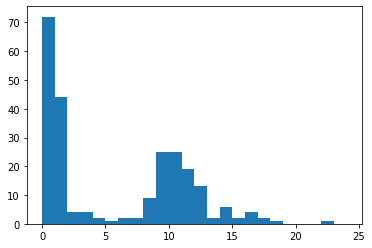

[[11 11 11  0 10  0  9  9  0  9  1 10  0  1 10  2  0  0  0  1  0 11 12 12
   0  0  0 12 12  0  9  0  8  1  2 10  1  0  0  1  6  0  1  1 14  1 10  1
   9  8  0  9  1  0  0  1 11  9  4 11  8  8  0  3 12  4  0  0 10  0  8  8
   7  9  1 11  9  0  0 10  0  0 10  0  1 10  9  9  9  0  0  0  0 11  1  1
   1 10  0  0  8  9 10  1  0  1  1  0  0  7 10  9  1  0  9  1  0  0  9  9
   0  9 10  0  0  0 10  1 12  0  0  0  1  0  0 10 10 11 11 12 11  0  1  0
  10 11 10  0 10 11  9  3 13 11  1 12  9  0 10  0  1 22  0  1 16 16 17  0
  15  0  0 16 16  1  0  0 14  0 14 13  1  2  0  1 18  0  1 17  0  1 11  9
   0  1 10 12  0 14 12 14 14  1  1 15 12  1  1  1 10  0  0 12  6  8  2 10
   0  5  1 11 11 10  0  3  1  0  9 10  9 11  8  1  3 11  1  9  0 12  1  9]]


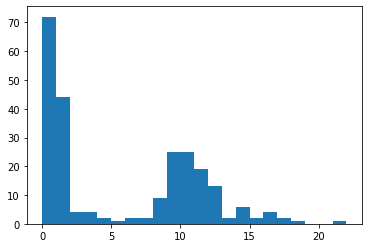

[[11 11 11 11 11 11 10 11 11 11 11 11 11 11 11 11  0  0  0  0  1  8 12 11
   8 10  5  1  0  0  0  0  9  9  9  9  9  9  9  9  8 10  5  1  0  0  0  0
   9  9  9  9  9  3  0  0  2  1  4 10 10 10 10 10  0  0  0  0  0  1  0  0
   2  0  7 11 11 10 11 10  3  0  2  0  0  1  1  0  0  2  2  1  0  0  0  0
   0  0  0  0  0  0  1  1  1  0  0  0  0  0  2  0 11 11 11 11 11 11 11 11
  12 12 12 12 12 12 12 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  11 12 12 13 13 13 12 13 10 12  5  0  0  0  0  1  9  9  9  9 10  3  0  0
   0  1  1  6  6  8  5  4  3  1  1  1  0  1  5  2  2  2  5  9  9 10 10 10
   0  0  1  1  0  0  0  0  0  0  1  1  0  0  0  0  0  1  1  0  1  8  9  7
   5  9  5  1  0  0  0  3  1  1  1  3  4  2  0  1  1  1  8  8 12 14 13 13
   0  2  1  0  1  6 10 10  9  9 10  4  1  1  1  2  5  9  9  9 11 10  8  8
   8  8  4  1  1  0  0  2 14 11  9  9 10  2  1  1  0  0  0  0  0  0  0  2
   5  1  0  0  1  1  1  1  1  2  6 10 10 11  9  8 10 10  9 11 17 10  2  4
   4  1  8 12 10 11 10 10  9  9  8  7 

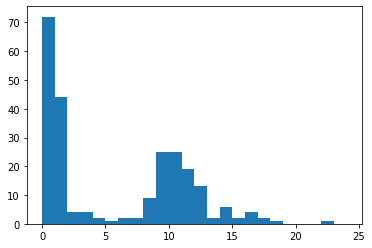

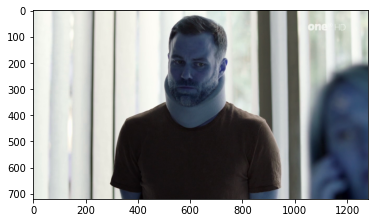

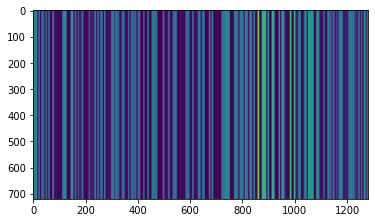

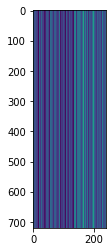

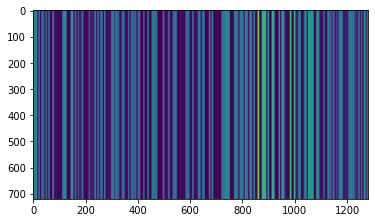

##############################################
[[13 13 12 12 12 12 12 12 12 12 12 12 13 13 13 13  0  0  0  0  0  7 12 10
  10  9  3  1  0  0  0  0 10 12 12 15 12 12 12 12 12 14  7  0  0  0  0  0
  11 12 14 14 12  5  0  0  0  0  1 12 12 15 15 14  0  0  0  0  0  0  0  0
   0  2  6 12 16 16 17 16  0  0  0  1  2  1  0  1  2  2  0  0  1  0  0  0
   0  0  0  0  0  0  1  1  0  0  0  0  0  1  0  0 13 16 18 18 17 17 17 17
  16 16 16 16 16 16 15 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  16 16 15 15 16 16 16 16 16 17 10  2  0  0  0  0 16 16 16 16 17  4  0  0
   1  0  0  0  0  1  4  0 15 19 17 17 17  4  0  1  0  0  5 15 17 17 18 16
   0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  1  1 11 18 14
  19 16  8  0  0  0  0  0  0  0  0  0  0 10 19 16 19 18 17 18 23 16 14 15
   1  1  0  1  1  0  1  1  2  2 11 22 20 22 20 20  1  1  0  0  0  5  5  2
   2  0 11 22 25 19 21 21  2  0  2  1  0  3  1  0  0  0  9 16 18 17 22 20
   3  2  1  1  2  2  0  0  1  3  9 14 11 16 19 18  1  3  1  2  4 

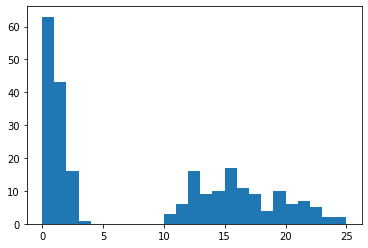

[[12 12 13  0 10  0 12 12  0 14  0 15  0  0 16  0  2  0  0  1  1 18 17 16
   0  0  0 15 16  0 16  1  1 17  1 17  0  0  0  1 17  0  0 18 17  0  2 22
   0  2 20  2  0 17  1  1 15  1 14  2  0  2 13 11  1 15  1  1 12 16 13 15
   0 13  0  1 14  1 15  1  0  0  0 13  0  0 12  0 12  0 15 14  1 12 13 15
   0  0  0  0 13 15 14  1 12  1  1 15  0 13 15  3 14 12 12  1  2 16 11 10
  15 11  2 17 10 15 19 20 19 23 22  0  0  0 21 19 19 19 21  0 19  1 19  0
   1 21  1 19 21 22  0 20 20  0 20  0  0  1 19  0  1 21  0  1 21 22 21  2
  22  0  1 24 23  1  0  0 20  0 18 24  0  0  1  0 19  0  2 17  2  1 16 18
   1  1 16 17  0 14 15 16 15  1  0 14 14 15  1  1  1  1 16  2  1  1 13 12
   0 11 14 16  1  0  0  2  0 15 12  2 11  1  0 12  2  2  1 12 11  1 12  0]]


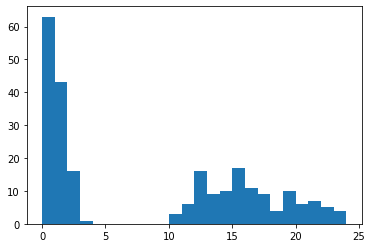

[[13 13 12 12 12 12 12 12 12 12 12 12 13 13 13 13  0  0  0  0  0  7 12 10
  10  9  3  1  0  0  0  0 10 12 12 15 12 12 12 12 12 14  7  0  0  0  0  0
  11 12 14 14 12  5  0  0  0  0  1 12 12 15 15 14  0  0  0  0  0  0  0  0
   0  2  6 12 16 16 17 16  0  0  0  1  2  1  0  1  2  2  0  0  1  0  0  0
   0  0  0  0  0  0  1  1  0  0  0  0  0  1  0  0 13 16 18 18 17 17 17 17
  16 16 16 16 16 16 15 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  16 16 15 15 16 16 16 16 16 17 10  2  0  0  0  0 16 16 16 16 17  4  0  0
   1  0  0  0  0  1  4  0 15 19 17 17 17  4  0  1  0  0  5 15 17 17 18 16
   0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  1  1 11 18 14
  19 16  8  0  0  0  0  0  0  0  0  0  0 10 19 16 19 18 17 18 23 16 14 15
   1  1  0  1  1  0  1  1  2  2 11 22 20 22 20 20  1  1  0  0  0  5  5  2
   2  0 11 22 25 19 21 21  2  0  2  1  0  3  1  0  0  0  9 16 18 17 22 20
   3  2  1  1  2  2  0  0  1  3  9 14 11 16 19 18  1  3  1  2  4  8 16 17
  11 14  5  2  3  2  1  0  0  1  0  1 

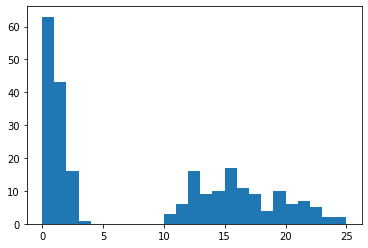

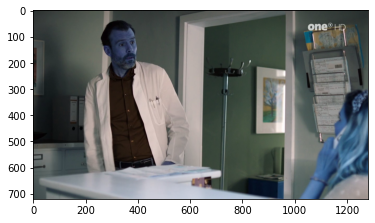

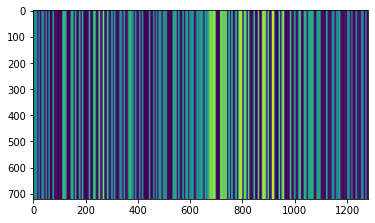

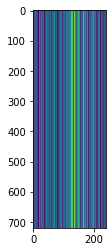

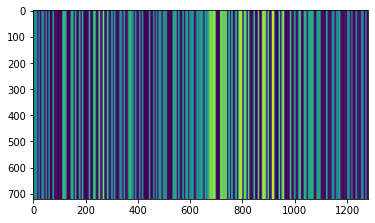

##############################################
[[12 12 12 11 14 14 14 12 12 14 12 11 10 14 11  8  0  0  1  0  2 10 12 10
  12 13  8  2  1  1  1  4 11 10 10 10 11 11 11 11 11 12  8  1  0  0  0  0
   9  9  9 11  9  1  0  0  0  0  4 11 12  9 15  9  0  1  1  0  0  0  0  1
   1  0  4 10 11 11 11 11  1  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  1  1  1  1  1  1  1  1  2  2  5 15 12 12 12 14 18 20
  23 25 22 16 16 17 15 16  2  2  1  0  1  1  1  1  1  1  1  1  1  1  1  1
   7  8  8  9  8  8  9  9  8  8  4  1  0  1  1  1  9  8  8  9  7  2  1  1
   1  1  2  5  7  7  7  7  2  2  2  2  1  2  2  2  2  3  4  7  7  8  7  7
   2  1  2  4  3  3  4  4  2  2  2  2  2  2  2  2  1  1  1  1  1  4  9 10
   8 11  9  2  2  2  2  2  2  5  9  8  7  5  3  1  1  3  4  8  9  8  7  7
   1  0  1  1  1  1  0  0  0  1  0  1  1  0  0  1  0  1  0  1  1  5 10  9
  10 10 10 10 10 10 12 11  0  0  0  0  0  0  0  1  5  0  1  0  0  0  0  0
  15 11 12 17 17 16 18 17 23 15 15 15 16 18  8  4 11 11 11 14 15 

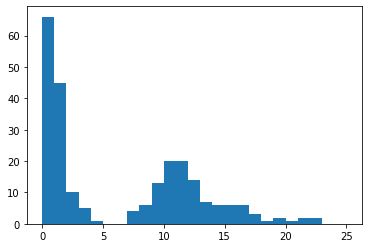

[[12 12 13  1 11  1 10 11  0  9  0  9  1  1 11  0  0  0  0  1  1 12 22 17
   1  1  1  8  9  1  8  1  7  2  2  8  2  3  2  1  9  2  9  1  8  1  0  0
   0 10 10  0  3  0 13 20 18 11 13  2 15  2 16 11  7  0 11  3 16  0  1  0
  10 15  8  1  2 12  0 11  0 12  0  0 11 13  0 10 11  9  9  0  0  1 15  0
  13 10  0  0 12 11 12 14  1  0 12  1  0 11  0  0 12  0 12  1 10  0  8  0
   0  0  1 11 12  0  0  0  0  7  0  0  1 14  0  9 10 12  1 10 11 11  1  7
  10  1  0  0 10  1  1  1  0  0 11  0  9  1 10  0  1 10  1  1 11 10 10  0
   9  1  0 11 11  0  1  1 11  0 10 10  0  0  0  0 13  1  0  9  0  0 11 10
   0  1 21 21  1 19 16 19 22  1  0 16  0  0  1  0  2 17 16 14  0 12 15  0
  16  1 10  1  3 13  0 14 15 17 10 14 12  1  3 15  4  1  9  9  0 14  2  1]]


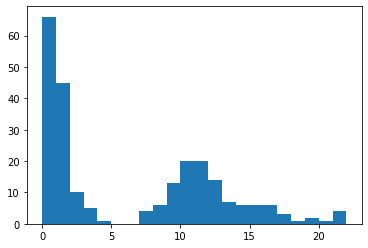

[[12 12 12 11 14 14 14 12 12 14 12 11 10 14 11  8  0  0  1  0  2 10 12 10
  12 13  8  2  1  1  1  4 11 10 10 10 11 11 11 11 11 12  8  1  0  0  0  0
   9  9  9 11  9  1  0  0  0  0  4 11 12  9 15  9  0  1  1  0  0  0  0  1
   1  0  4 10 11 11 11 11  1  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  1  1  1  1  1  1  1  1  2  2  5 15 12 12 12 14 18 20
  23 25 22 16 16 17 15 16  2  2  1  0  1  1  1  1  1  1  1  1  1  1  1  1
   7  8  8  9  8  8  9  9  8  8  4  1  0  1  1  1  9  8  8  9  7  2  1  1
   1  1  2  5  7  7  7  7  2  2  2  2  1  2  2  2  2  3  4  7  7  8  7  7
   2  1  2  4  3  3  4  4  2  2  2  2  2  2  2  2  1  1  1  1  1  4  9 10
   8 11  9  2  2  2  2  2  2  5  9  8  7  5  3  1  1  3  4  8  9  8  7  7
   1  0  1  1  1  1  0  0  0  1  0  1  1  0  0  1  0  1  0  1  1  5 10  9
  10 10 10 10 10 10 12 11  0  0  0  0  0  0  0  1  5  0  1  0  0  0  0  0
  15 11 12 17 17 16 18 17 23 15 15 15 16 18  8  4 11 11 11 14 15 16 14 14
  12 23 18 10  4  2  2  2 16 15 15 15 

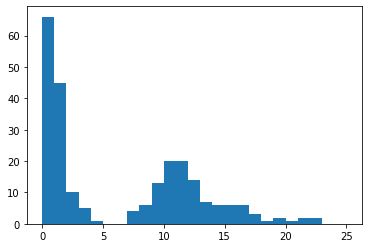

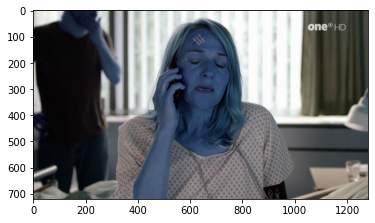

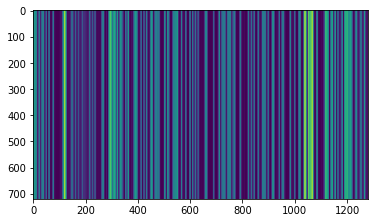

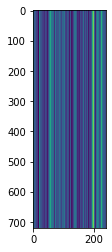

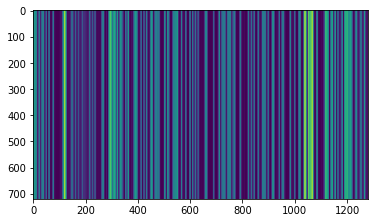

##############################################
[[15 16 21 16  2  1  8  8  8  7  3  3  4  3  0  1  2  2  1  3 11 11 14 23
  18 12 12  7  2  1  7 11 23 21 23 23 23 23 23 23 24 23 10  0  0  1  0  5
  20 20 20 20 24  8  0  1  1  0  9 24 23 23 23 23  1  1  1  1  1  1  1  1
   1  0  8 24 21 21 21 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1 22 22 22 22 22 22 22 22
  22 22 22 22 20 20 20 20  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1
  21 21 21 21 22 21 21 19 19 24 14  1  0  0  0  0 22 22 22 22 23  9  0  2
   0  0  8 20 19 19 19 19 19 19 19 19 20  5  0  1  1  0  9 22 22 22 22 22
   1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 12 22 19
  16 16 10  2  0  1  1  0  1  1  0  0  0  0  0  0  1  0  5 23 22 22 23 22
   0  0  0  0  0 11 20 20 20 22 15  0  2  0  0  3 20 20 20 20 20 20 20 20
  19 23 10  0  1  0  0  0 20 20 20 19 23 10  0  1  0  0  0  0  0  1  1  0
   0  0  0  0  0  1  1  1  1  2 11 24 23 18 19 23 24 16 13 12 19 

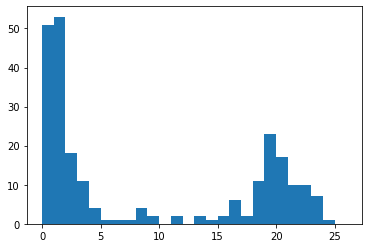

[[20  8  3  1 21  1 23 24  1 20  1 23  1  1 21  0  0  0  0  0  1 22 22 20
   0  0  1 21 19  0 22  1 19 19  1 22  1  0  0  0 18  1  0  1 22  0 20  0
  20 20  0 20  1  1  0  1 19 13  4 13 11 20  2  2  2  9  2  0  2  0  9  8
   2  4  5 19 14  0  4 21 21 23 20 19  0  3 21 19  0 23  1  1 22  0  3 23
   8  3  2  1 21 20  0  1  1 16  1  1  2  1  0  0  0  3 22 17  1  1  1 20
  22  2  1 16  3 19 20 18  3  1  1  7 11  1  3 21 19  0 17 19  0  2 22  1
   2  3 22  0  2  1  8  1  1  2 19 19 19  1 18  1  1 18  2  0 20 19 19  0
  19  0  0 20 20  1  1  1 18  3 18  6  0  0  0  1 23  1  1 19  0  0 23 21
   0  1 21 20  0 19 20 19 18  0  0  0 19  0  0  0  0 18  1 19 19  1  1  4
  19  2 18  0  0 16  2 15  0  1  1  2  0  1 18 18  2 16 15  3 16  1 16  1]]


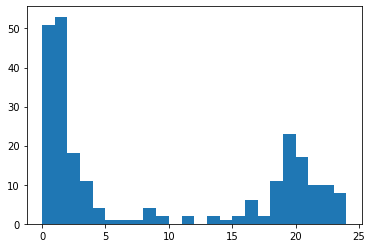

[[15 16 21 16  2  1  8  8  8  7  3  3  4  3  0  1  2  2  1  3 11 11 14 23
  18 12 12  7  2  1  7 11 23 21 23 23 23 23 23 23 24 23 10  0  0  1  0  5
  20 20 20 20 24  8  0  1  1  0  9 24 23 23 23 23  1  1  1  1  1  1  1  1
   1  0  8 24 21 21 21 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1 22 22 22 22 22 22 22 22
  22 22 22 22 20 20 20 20  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1
  21 21 21 21 22 21 21 19 19 24 14  1  0  0  0  0 22 22 22 22 23  9  0  2
   0  0  8 20 19 19 19 19 19 19 19 19 20  5  0  1  1  0  9 22 22 22 22 22
   1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 12 22 19
  16 16 10  2  0  1  1  0  1  1  0  0  0  0  0  0  1  0  5 23 22 22 23 22
   0  0  0  0  0 11 20 20 20 22 15  0  2  0  0  3 20 20 20 20 20 20 20 20
  19 23 10  0  1  0  0  0 20 20 20 19 23 10  0  1  0  0  0  0  0  1  1  0
   0  0  0  0  0  1  1  1  1  2 11 24 23 18 19 23 24 16 13 12 19 12  4  4
   3  0 10 12 12 13 13 15 12  9 11 13 

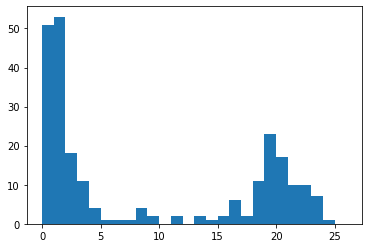

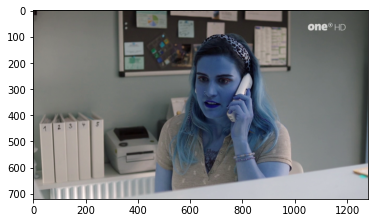

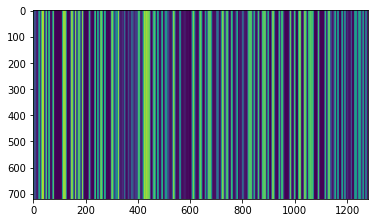

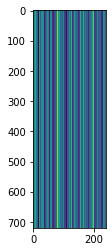

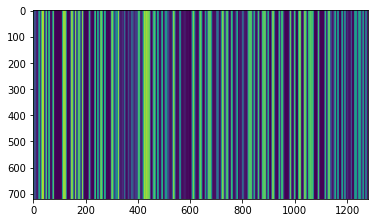

##############################################
[[11 11 11 12 12 12 12 12 11 12 12 12 11 12 11  9  4  2  1  1  1  8 13 12
  12 12 10  1  0  0  0  0 10 15 13 13 15 15 13 12 12 16 12  3  0  0  1  0
  12 12 12 12 16  4  0  2  1  0  4 11 12 12 11  9  5  2  0  1  0  0  0  1
   2  0  5 15 13 13 16 13  0  1  1  1  0  0  0  0  0  0  0  0  1  1  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1 10 15 12 13 13 15 17 16
  12 12 12 15 15 15 14 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  13 16 16 16 16 15 16 16 16 17 10  2  1  1  1  1 19 17 16 16 16  6  0  0
   1  1  1  2  0  1  1  1  0  0  0  0  0  1  2  1  9  4  8 15 17 18 17 16
   2  0  0  0  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  1  4  8 12 15
  15 12  7  3  1  0  0  0  0  0  0  0  0 10 18 17 17 18 19 16 19 17 16 17
   3  0  0  0  0  0  0  1  0  0  4 12 14 12 14 12  2  2  1  2  0  0  7  2
   3  2  1  9 16 18 17 19  3  0  2  2  1  2  3  4  3  1  7 21 19 18 16 19
   3  2  2  0  3  0  0  0  0  0  8 11 15 16 16 16  1  1  4  3  2 

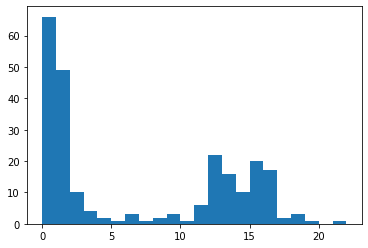

[[11 12 12  1 12  0 13 12  0 12  2 12  0  2 13  1  0  1  0  0  0 12 14 15
   0  0  0 16 16  1 16  1  1  0  5 18  0  1  0  0 15  0  0 17 17  0  1 12
   1  3 18  2  4 18  2  0 16  4 12  2  3  1 11 13  0 12  0  2 12 14 11 16
   0 13  2  8 13  0 12  0 13 12  0  0  1 14 15  0  1 13 15 15 15  0 15  1
   1  1  0  1 13 12  0  0 13 13  1 15  1  1  0 15 16 16 16 16  1 15  1 13
   0  0 16  1 15  1 12  1  1 14 15  1 15  0 15 15 14  0 15  0  0  0  0  1
  13  1  0 14  1  0  2  1  0 15  0  1  0  1 16  0  0 16  0  1 13 15 13  0
  14  1  0 14  9  0  1  1 12  1 10 12  0  1  1  1 19  1  0 21  1  0 14 12
   1  0 16 16  2 16 16 16 15  0  1  0 15 14  1  1 13  0 12  6  8  0  0 12
   0  6 11  1  3 11  0  1  1  0  0 11  0  6  2  7  9  9 12  0 12  0 13  3]]


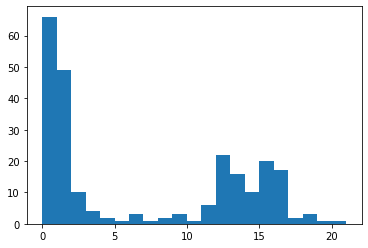

[[11 11 11 12 12 12 12 12 11 12 12 12 11 12 11  9  4  2  1  1  1  8 13 12
  12 12 10  1  0  0  0  0 10 15 13 13 15 15 13 12 12 16 12  3  0  0  1  0
  12 12 12 12 16  4  0  2  1  0  4 11 12 12 11  9  5  2  0  1  0  0  0  1
   2  0  5 15 13 13 16 13  0  1  1  1  0  0  0  0  0  0  0  0  1  1  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1 10 15 12 13 13 15 17 16
  12 12 12 15 15 15 14 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  13 16 16 16 16 15 16 16 16 17 10  2  1  1  1  1 19 17 16 16 16  6  0  0
   1  1  1  2  0  1  1  1  0  0  0  0  0  1  2  1  9  4  8 15 17 18 17 16
   2  0  0  0  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  1  4  8 12 15
  15 12  7  3  1  0  0  0  0  0  0  0  0 10 18 17 17 18 19 16 19 17 16 17
   3  0  0  0  0  0  0  1  0  0  4 12 14 12 14 12  2  2  1  2  0  0  7  2
   3  2  1  9 16 18 17 19  3  0  2  2  1  2  3  4  3  1  7 21 19 18 16 19
   3  2  2  0  3  0  0  0  0  0  8 11 15 16 16 16  1  1  4  3  2  1  8 11
  12 12  5  3  2  2  1  2  2  2  3  1 

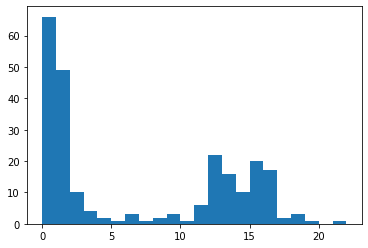

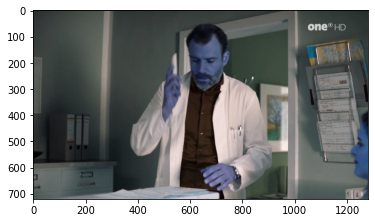

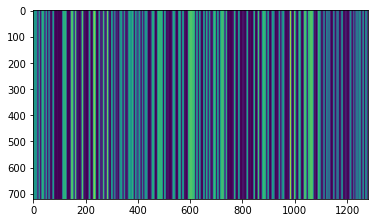

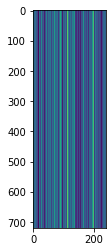

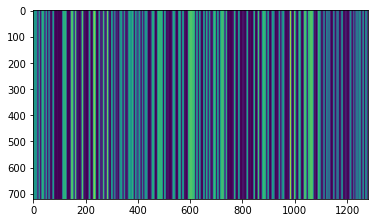

##############################################


In [3]:
    width = 1280
    height = 720
    cap = cv.cv2.VideoCapture('video.ts')
    
    i = 0
    while cap.isOpened() and i < 1000:
        i+=1
        ret, frame = cap.read()
        if ret and i % 100 == 0:
            # drop all but the first component of YCR_CB colorspace to only keep luma
            first_row_luma = cv.cvtColor(frame, cv.COLOR_BGR2YCR_CB)[0, :, 0][None]
            # 30 bytes of data
            resized = cv.resize(first_row_luma, (30 * 8, 1))
            resized_back_orig = cv.resize(first_row_luma, (width, 1))

            np.set_printoptions(threshold=np.inf)
            print(first_row_luma)
            show_bins(first_row_luma)
            
            print(resized)
            show_bins(resized)
            
            print(resized_back_orig)
            show_bins(resized_back_orig)

            imshow_luma = np.repeat(first_row_luma, height, axis=0)
            imshow_resized_luma = np.repeat(resized, height, axis=0)
            imshow_resized_back_luma = np.repeat(resized_back_orig, height, axis=0)
            
            plt.imshow(frame)
            plt.show()
            
            plt.imshow(imshow_luma)
            plt.show()
            plt.imshow(imshow_resized_luma)
            plt.show()
            plt.imshow(imshow_resized_back_luma)
            plt.show()
            
            print("##############################################")